In [1]:
#IMPORTING NECCESSARY MODULES
# -----------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diabetes_data = pd.read_csv('diabetes.csv') # Reading the dataset into diabetes_data

In [3]:
diabetes_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_data.isnull().sum() # Count of null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
diabetes_data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
diabetes_data_copy = diabetes_data.copy()
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
# Replacing null values with mean value
# ----------------------------------------
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(),inplace=True)
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(),inplace=True)
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].mean(),inplace=True)
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].mean(),inplace=True)

In [8]:
diabetes_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## FEATURE_SCALING
### 1.NORMALIZATION

<AxesSubplot:>

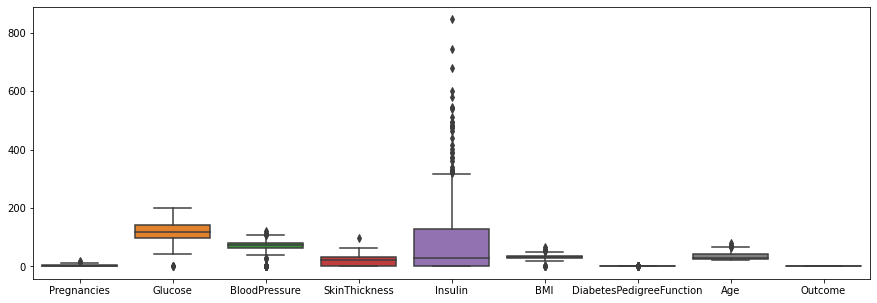

In [9]:
# DATA DISTRIBUTION BEFORE FEATURE SCALING
plt.subplots(figsize=(15, 5))         #setting figure size
sns.boxplot(data=diabetes_data)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
columns_to_scale = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
scaled_data = scaler.fit_transform(columns_to_scale)
scaled_data = pd.DataFrame(scaled_data,columns=diabetes_data_copy.columns[:-1])
scaled_data['Outcome'] = diabetes_data_copy['Outcome']

diabetes_data_copy = scaled_data
diabetes_data_copy.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.670968,0.489796,0.304348,0.17013,0.314928,0.234415,0.483333,1
1,0.058824,0.264516,0.428571,0.239130,0.17013,0.171779,0.116567,0.166667,0
2,0.470588,0.896774,0.408163,0.240798,0.17013,0.104294,0.253629,0.183333,1


<AxesSubplot:>

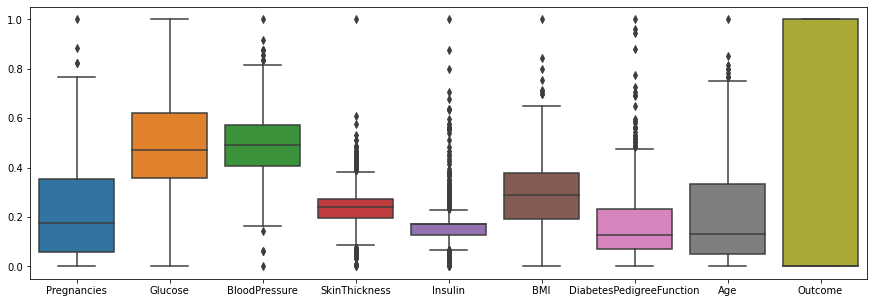

In [11]:
# DATA DISTRIBUTION AFTER NORMALIZATION
plt.subplots(figsize=(15, 5))         
sns.boxplot(data=diabetes_data_copy)

### 2.STANDARDIZATION

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = diabetes_data_copy.drop(['Outcome'],axis=1)
y = diabetes_data_copy['Outcome']
std_diabetes_data = scaler.fit_transform(cols_to_scale)
std_diabetes_data = pd.DataFrame(data=std_diabetes_data,columns=diabetes_data_copy.columns[:-1])
std_diabetes_data['Outcome'] = diabetes_data_copy['Outcome']
std_diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.665502,-2.717877e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.017463,-2.717877e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,0.000000,-2.717877e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-0.700429,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,0.665502,1.465506e-01,1.548980,5.484909,-0.020496,1


In [76]:
std_diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-9.251859e-18,1.000652,-1.141852,-0.844885,-2.509521e-01,6.399473e-01,3.906578
Glucose,768.0,-1.156482e-17,1.000652,-2.554131,-0.721221,-1.540881e-01,6.103090e-01,2.541850
BloodPressure,768.0,-3.932040e-16,1.000652,-4.004245,-0.695306,-1.675912e-02,6.282695e-01,4.102655
SkinThickness,768.0,1.179612e-16,1.000652,-2.521670,-0.472774,0.000000e+00,3.240194e-01,7.950467
Insulin,768.0,-2.844947e-16,1.000652,-1.665945,-0.400729,-2.717877e-16,-2.717877e-16,8.126238
BMI,768.0,2.035409e-16,1.000652,-2.075119,-0.721540,-8.363615e-03,6.029301e-01,5.042087
DiabetesPedigreeFunction,768.0,2.775558e-17,1.000652,-1.189553,-0.688969,-3.001282e-01,4.662269e-01,5.883565
Age,768.0,1.156482e-18,1.000652,-1.041549,-0.786286,-3.608474e-01,6.602056e-01,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000e+00,1.000000e+00,1.000000


<AxesSubplot:>

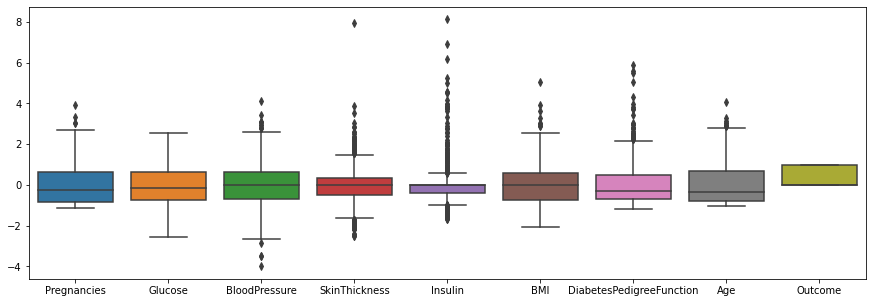

In [77]:
# DATA DISTRIBUTION AFTER STANDARDIZATION
plt.figure(figsize=(15,5))
sns.boxplot(data=std_diabetes_data)

## SMOTE ANALYSIS

<AxesSubplot:xlabel='Outcome', ylabel='count'>

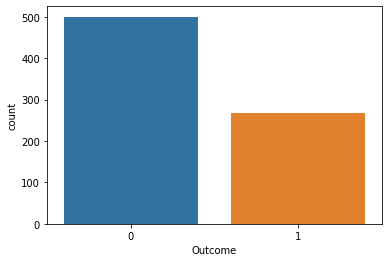

In [78]:
# OUTCOME DISTRIBUTION BEFORE SMOTE ANALYSIS
sns.countplot(data=std_diabetes_data,x='Outcome')

In [79]:
std_diabetes_data.shape

(768, 9)

In [80]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x = std_diabetes_data.drop(['Outcome'],axis=1)
y = std_diabetes_data['Outcome']
x_smote,y_smote = smote.fit_resample(x,y)
data_after_smote = pd.DataFrame(data=x_smote,columns=std_diabetes_data.columns[:-1])
data_after_smote['Outcome'] = pd.DataFrame(y_smote)
data_after_smote.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,0.665502,-2.717877e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-0.017463,-2.717877e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,0.000000,-2.717877e-16,-1.332833,0.604397,-0.105584,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

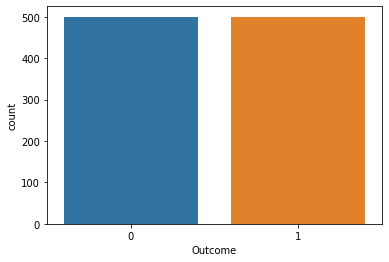

In [81]:
sns.countplot(data=data_after_smote,x='Outcome')

In [82]:
data_after_smote.shape

(1000, 9)

## FEATURE SELECTION

In [83]:
corr_matrix = diabetes_data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:title={'center':'Correlation Heatmap'}>

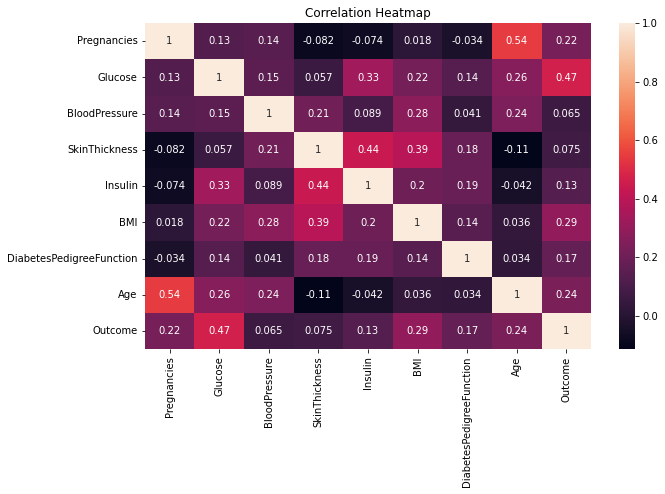

In [84]:
plt.figure(figsize=(10,6))
plt.title("Correlation Heatmap")
sns.heatmap(corr_matrix,annot=True)

In [85]:
#ANOVA FEATURE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x = diabetes_data_copy.drop(columns='Outcome',axis=1)
y = diabetes_data_copy['Outcome']

In [86]:
fvaluse_selector = SelectKBest(f_classif,k=4)
x_kbest = fvaluse_selector.fit_transform(x,y)

In [87]:
x_kbest.shape

(768, 4)

In [88]:
pd.DataFrame(x_kbest)

,0,1,2,3
0,0.352941,0.670968,0.314928,0.483333
1,0.058824,0.264516,0.171779,0.166667
2,0.470588,0.896774,0.104294,0.183333
3,0.058824,0.290323,0.202454,0.000000
4,0.000000,0.600000,0.509202,0.200000
...,...,...,...,...
763,0.588235,0.367742,0.300613,0.700000
764,0.117647,0.503226,0.380368,0.100000
765,0.294118,0.496774,0.163599,0.150000
766,0.058824,0.529032,0.243354,0.433333


In [96]:
#BACKWARD SELECTION
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
sfs1 = sfs(rf,k_features=4,forward=False,verbose=1,scoring='accuracy',cv=0)
sfs1 = sfs1.fit(x,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.3s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s finished
Features: 4/4

In [97]:
selected_features = list(sfs1.k_feature_names_)
print(selected_features)

['Pregnancies', 'Glucose', 'BloodPressure', 'BMI']


..............................................................................................................

## ALGORITHMS